In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'D:/VSCODE code/MTH 522 Code/Project 3/Processed_data.csv')
df.head()

C:\Users\devch\AppData\Local\Temp\ipykernel_1020\400017089.py:1: DtypeWarning: Columns (0,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'D:/VSCODE code/MTH 522 Code/Project 3/Processed_data.csv')


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,Tier
0,I152049588,614,LARCENY THEFT FROM MV - NON-ACCESSORY,D4,155.0,0,2015-06-15 00:01:00,2015,6,Monday,0,CONCORD SQ,42.341384,-71.078989,"(42.34138415, -71.07898883)",Tier 3
1,I152049593,1874,DRUGS - OTHER,C11,289.0,0,2015-06-15 00:01:00,2015,6,Monday,0,HANCOCK ST,42.310434,-71.061340,"(42.31043400, -71.06134010)",Tier Drugs
2,I152049594,1874,DRUGS - OTHER,C11,289.0,0,2015-06-15 00:01:00,2015,6,Monday,0,HANCOCK ST,42.310434,-71.061340,"(42.31043400, -71.06134010)",Tier Drugs
3,I152049463,1402,VANDALISM,E18,493.0,0,2015-06-15 00:03:00,2015,6,Monday,0,LEXINGTON AVE,42.262551,-71.115822,"(42.26255067, -71.11582205)",Tier 4
4,I152049469,802,ASSAULT SIMPLE - BATTERY,D14,809.0,0,2015-06-15 00:45:00,2015,6,Monday,0,BAGNAL ST,42.359569,-71.135982,"(42.35956890, -71.13598188)",Tier 2


In [3]:
df.describe()

,OFFENSE_CODE,REPORTING_AREA,YEAR,MONTH,HOUR,Lat,Long
count,216538.00000,184600.000000,216538.000000,216538.000000,216538.000000,2.165380e+05,2.165380e+05
mean,1325.43978,366.336176,2018.702648,6.748972,13.186706,4.232476e+01,-7.108150e+01
std,1179.44964,240.818150,2.429368,3.316678,6.421299,1.324030e-01,2.180396e-01
min,111.00000,1.000000,2015.000000,1.000000,0.000000,1.327276e-07,-7.117867e+01
25%,613.00000,165.000000,2017.000000,4.000000,9.000000,4.230056e+01,-7.109588e+01
50%,801.00000,329.000000,2018.000000,7.000000,14.000000,4.233049e+01,-7.107645e+01
75%,1402.00000,522.000000,2021.000000,10.000000,18.000000,4.234948e+01,-7.106178e+01
max,3810.00000,962.000000,2023.000000,12.000000,23.000000,4.239504e+01,5.249691e-08


In [4]:
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_DESCRIPTION', 'DISTRICT',
       'REPORTING_AREA', 'SHOOTING', 'OCCURRED_ON_DATE', 'YEAR', 'MONTH',
       'DAY_OF_WEEK', 'HOUR', 'STREET', 'Lat', 'Long', 'Location', 'Tier'],
      dtype='object')

In [5]:
df['Tier'].value_counts()

Tier
Tier 3        89300
Tier 4        68045
Tier 2        47718
Tier Drugs    11081
Tier 1          394
Name: count, dtype: int64

In [6]:
df['STREET'].value_counts()

STREET
WASHINGTON ST                                           13644
BOYLSTON ST                                              6576
BLUE HILL AVE                                            5901
HARRISON AVE                                             4505
DORCHESTER AVE                                           3858
                                                        ...  
BRADLEE LN                                                  1
HARRISON AVE & WARREN PL\nROXBURY  MA 02119\nUNITED         1
95 WOODBOLE AVE\nMATTAPAN  MA 02126\nUNITED STATES          1
SOUTHAMPTON ST & DORCHESTER ST\nBOSTON  MA 02127\nUN        1
CENTRAL ST & INDIA ST\nBOSTON  MA 02109\nUNITED STAT        1
Name: count, Length: 9905, dtype: int64

In [7]:
df['DISTRICT'].value_counts()

DISTRICT
D4            34961
B2            31082
C11           27409
A1            25598
B3            20969
C6            17025
D14           14719
E13           11751
E18           10362
A7             9495
E5             8452
A15            4633
External         81
Outside of        1
Name: count, dtype: int64

In [8]:
df['Timestamp'] = pd.to_datetime(df['OCCURRED_ON_DATE'],format = 'ISO8601')

C:\Users\devch\AppData\Local\Temp\ipykernel_1020\3949197898.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise a warning unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Timestamp'] = pd.to_datetime(df['OCCURRED_ON_DATE'],format = 'ISO8601')


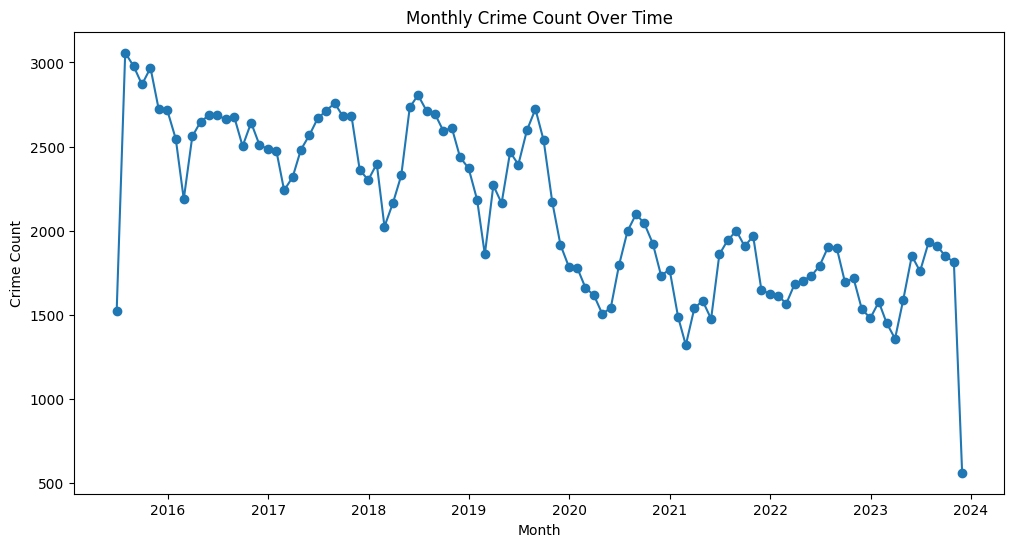

In [9]:
# Assuming your DataFrame is named 'crime_df'
df['Timestamp'] = pd.to_datetime(df['Timestamp'], utc = True)
monthly_crime_count = df.resample('M', on='Timestamp').size()

plt.figure(figsize=(12, 6))
plt.plot(monthly_crime_count, marker='o')
plt.title('Monthly Crime Count Over Time')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.show()

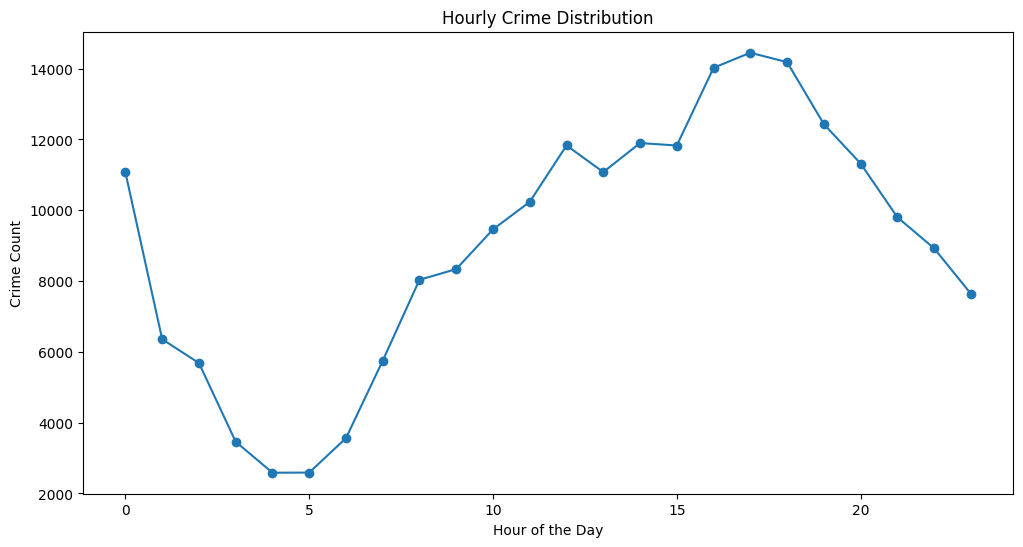

In [10]:
hourly_crime_count = df.groupby('HOUR').size()

plt.figure(figsize=(12, 6))
plt.plot(hourly_crime_count, marker='o')
plt.title('Hourly Crime Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Crime Count')
plt.show()

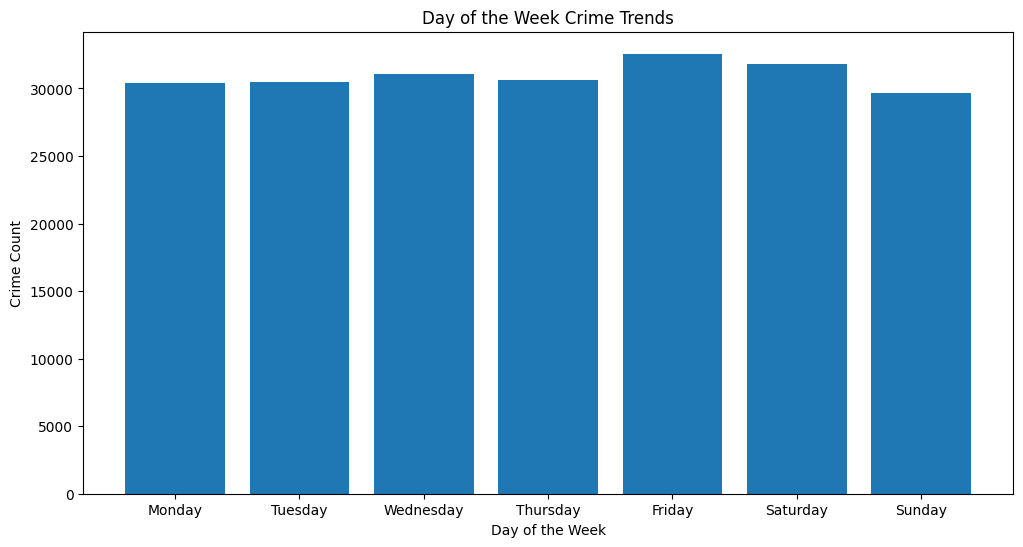

In [11]:
day_of_week_crime_count = df.groupby('DAY_OF_WEEK').size()

# Reorder days of the week for better visualization
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_crime_count = day_of_week_crime_count.reindex(ordered_days)

plt.figure(figsize=(12, 6))
plt.bar(day_of_week_crime_count.index, day_of_week_crime_count)
plt.title('Day of the Week Crime Trends')
plt.xlabel('Day of the Week')
plt.ylabel('Crime Count')
plt.show()

<Figure size 1200x600 with 0 Axes>

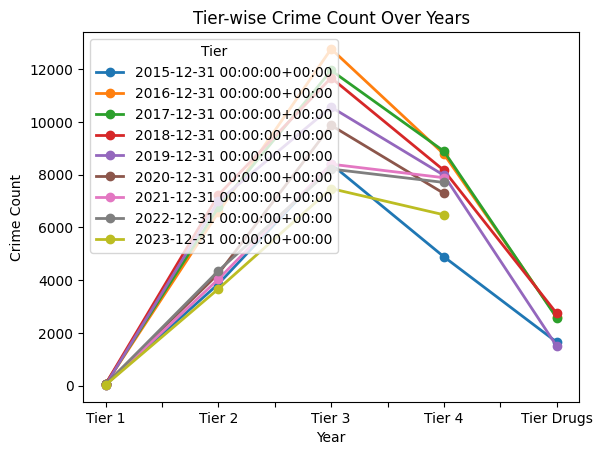

In [12]:

# Assuming your DataFrame is named 'crime_df'
df['Timestamp'] = pd.to_datetime(df['Timestamp'], utc=True)  # Set utc=True for timezone handling

# Group by tier and resample by year
tier_wise_crime_count = df.groupby(['Tier', pd.Grouper(key='Timestamp', freq='Y')]).size().unstack()

plt.figure(figsize=(12, 6))
tier_wise_crime_count.plot(marker='o', linestyle='-', linewidth=2)

plt.title('Tier-wise Crime Count Over Years')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.legend(title='Tier', loc='upper left')
plt.show()

In [13]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,Tier,Timestamp
0,I152049588,614,LARCENY THEFT FROM MV - NON-ACCESSORY,D4,155.0,0,2015-06-15 00:01:00,2015,6,Monday,0,CONCORD SQ,42.341384,-71.078989,"(42.34138415, -71.07898883)",Tier 3,2015-06-15 00:01:00+00:00
1,I152049593,1874,DRUGS - OTHER,C11,289.0,0,2015-06-15 00:01:00,2015,6,Monday,0,HANCOCK ST,42.310434,-71.061340,"(42.31043400, -71.06134010)",Tier Drugs,2015-06-15 00:01:00+00:00
2,I152049594,1874,DRUGS - OTHER,C11,289.0,0,2015-06-15 00:01:00,2015,6,Monday,0,HANCOCK ST,42.310434,-71.061340,"(42.31043400, -71.06134010)",Tier Drugs,2015-06-15 00:01:00+00:00
3,I152049463,1402,VANDALISM,E18,493.0,0,2015-06-15 00:03:00,2015,6,Monday,0,LEXINGTON AVE,42.262551,-71.115822,"(42.26255067, -71.11582205)",Tier 4,2015-06-15 00:03:00+00:00
4,I152049469,802,ASSAULT SIMPLE - BATTERY,D14,809.0,0,2015-06-15 00:45:00,2015,6,Monday,0,BAGNAL ST,42.359569,-71.135982,"(42.35956890, -71.13598188)",Tier 2,2015-06-15 00:45:00+00:00


---


### ARIMA

In [14]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [15]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)
monthly_crime_count = df.resample('M').size()

In [16]:
train_size = int(len(monthly_crime_count) * 0.8)
train, test = monthly_crime_count[:train_size], monthly_crime_count[train_size:]

In [17]:
order = (1, 1, 1)  # Example order, you may need to adjust
model = ARIMA(train, order=order)
fitted_model = model.fit()


c:\Users\devch\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\devch\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [18]:
predictions = fitted_model.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')


c:\Users\devch\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [19]:
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 91910.82032922114


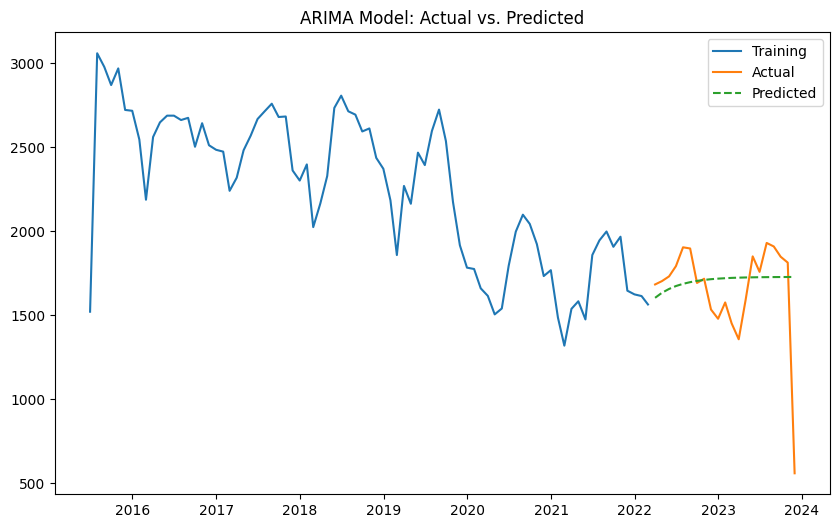

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(predictions, label='Predicted', linestyle='--')
plt.legend()
plt.title('ARIMA Model: Actual vs. Predicted')
plt.show()


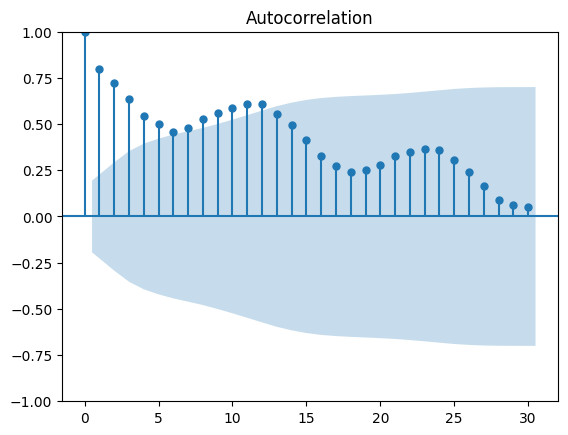

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(monthly_crime_count, lags=30)
plt.show()

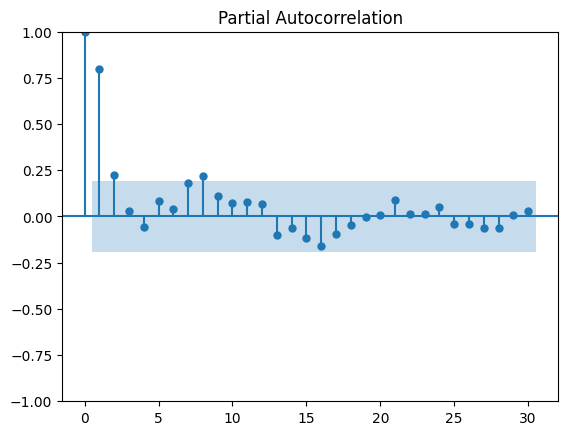

In [22]:
plot_pacf(monthly_crime_count, lags=30)
plt.show()


In [23]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(monthly_crime_count)
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -0.20585490408755705
p-value: 0.9378201205449354


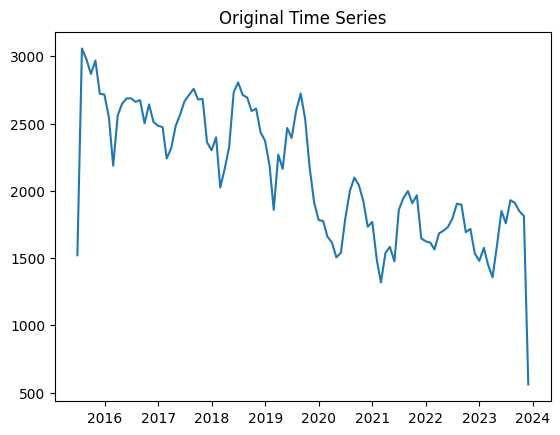

ADF Statistic: -0.20585490408755705
p-value: 0.9378201205449354


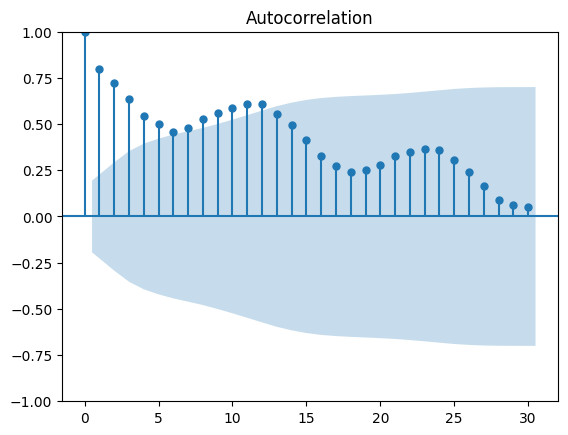

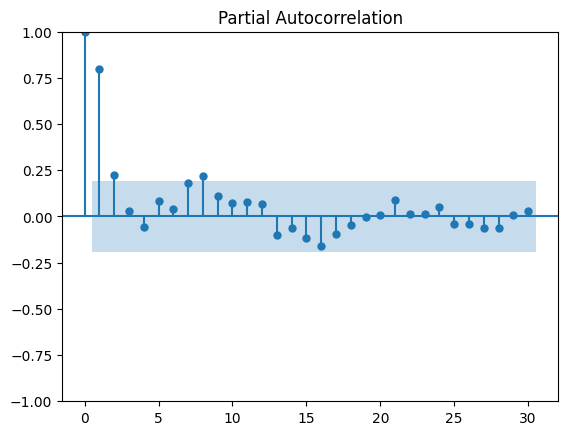

In [24]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Visualize the data
plt.plot(monthly_crime_count)
plt.title('Original Time Series')
plt.show()

# Check for stationarity
result = adfuller(monthly_crime_count)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Plot ACF and PACF
plot_acf(monthly_crime_count, lags=30)
plt.show()

plot_pacf(monthly_crime_count, lags=30)
plt.show()


Data is not stationary as shown by the p value. so, applying a differencing technique and reapplying ADF to check for stationarity again

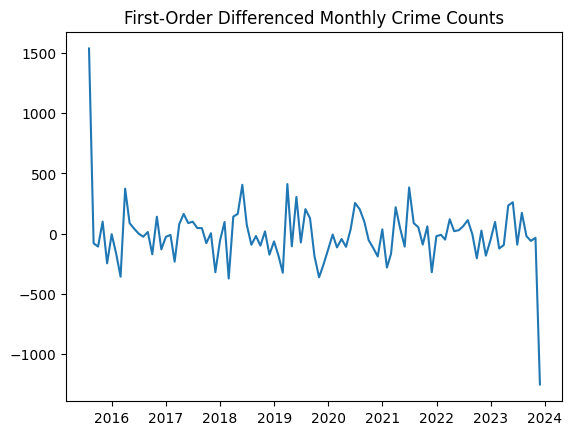

ADF Statistic after differencing: -4.121593442861802
p-value after differencing: 0.0008919171142150162


In [25]:
# First-order differencing
first_order_diff = monthly_crime_count.diff().dropna()

# Visualize differenced data
plt.plot(first_order_diff)
plt.title('First-Order Differenced Monthly Crime Counts')
plt.show()

# Check for stationarity after differencing
result_diff = adfuller(first_order_diff)
print('ADF Statistic after differencing:', result_diff[0])
print('p-value after differencing:', result_diff[1])


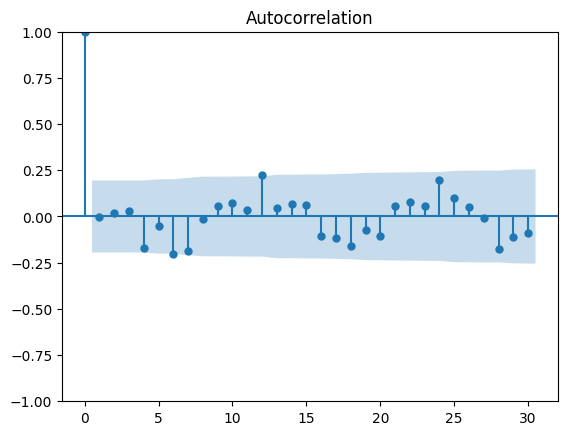

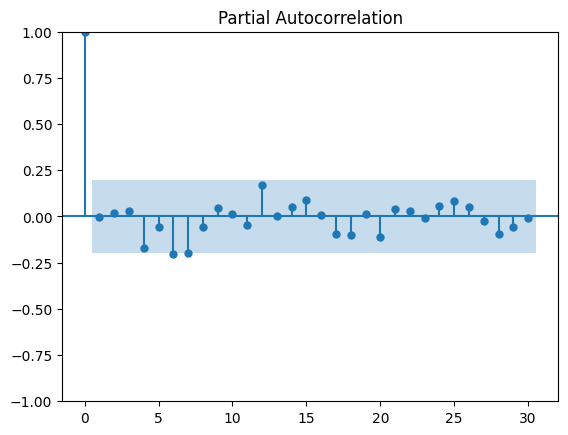

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(first_order_diff, lags=30)
plt.show()

plot_pacf(first_order_diff, lags=30)
plt.show()


In [27]:
from statsmodels.tsa.arima.model import ARIMA

# Example: ARIMA(1, 1, 1)
model = ARIMA(monthly_crime_count, order=(1, 1, 1))
fitted_model = model.fit()

# Make predictions
predictions = fitted_model.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')


c:\Users\devch\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\devch\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [28]:
from itertools import product

p_values = range(0, 3)  # Adjust the range based on your preferences
d_values = range(1, 2)  # Assuming first-order differencing
q_values = range(0, 3)  # Adjust the range based on your preferences

best_mse = float('inf')
best_params = None

for p, d, q in product(p_values, d_values, q_values):
    try:
        model = ARIMA(train, order=(p, d, q))
        fitted_model = model.fit()

        predictions = fitted_model.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
        mse = mean_squared_error(test, predictions)

        if mse < best_mse:
            best_mse = mse
            best_params = (p, d, q)

    except Exception as e:
        continue

print(f'Best Parameters: {best_params}')


c:\Users\devch\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\Users\devch\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\Users\devch\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\Users\devch\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa

Best Parameters: (2, 1, 2)


c:\Users\devch\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\Users\devch\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\Users\devch\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\devch\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:

In [29]:
order = (2, 1, 2)  # Example order, you may need to adjust
model = ARIMA(train, order=order)
fitted_model = model.fit()

c:\Users\devch\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\devch\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [30]:
predictions = fitted_model.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')


c:\Users\devch\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [31]:
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 89911.1829792384


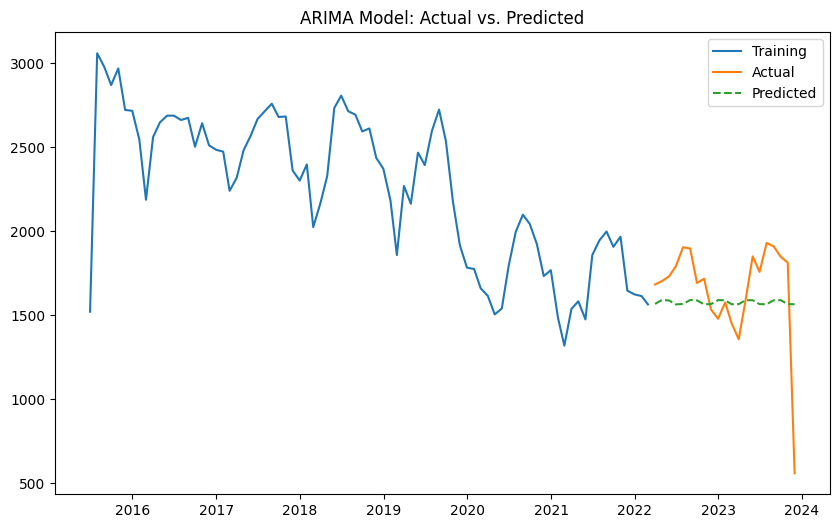

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(predictions, label='Predicted', linestyle='--')
plt.legend()
plt.title('ARIMA Model: Actual vs. Predicted')
plt.show()

In [33]:
from pmdarima import auto_arima

stepwise_fit = auto_arima(train, start_p=1, start_q=1, max_p=3, max_q=3, m=12, seasonal=False, trace=True)

print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1111.782, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1113.734, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1113.737, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1109.782, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.111 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   81
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -553.891
Date:                Fri, 08 Dec 2023   AIC                           1109.782
Time:                        16:24:46   BIC                           1112.164
Sample:                    06-30-2015   HQIC                          1110.737
                         - 02-28-2022                                         
Co

c:\Users\devch\AppData\Local\Programs\Python\Python311\Lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


c:\Users\devch\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\devch\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Mean Squared Error: 89911.1829792384


c:\Users\devch\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


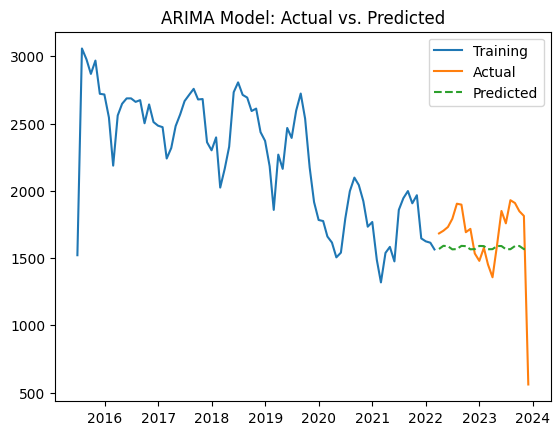

In [34]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the final ARIMA model
final_model = ARIMA(train, order=(2, 1, 2))
fitted_final_model = final_model.fit()

# Make predictions on the test set
predictions = fitted_final_model.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Evaluate the model performance
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualize the actual vs. predicted values
plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(predictions, label='Predicted', linestyle='--')
plt.legend()
plt.title('ARIMA Model: Actual vs. Predicted')
plt.show()


## Exponential Smoothing State Space Model

In [35]:
# Exponential smoothing state space model
from statsmodels.tsa.holtwinters import ExponentialSmoothing

ets_model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12)
fitted_ets_model = ets_model.fit()
predictions_ets = fitted_ets_model.predict(start=len(train), end=len(train) + len(test) - 1)


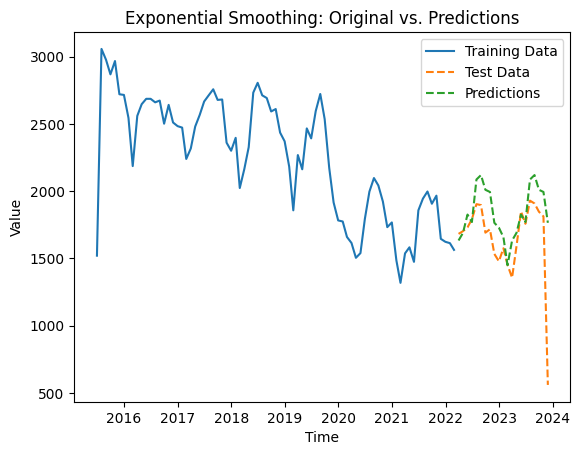

In [36]:
# Plotting the original time series
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data', linestyle='--')

# Plotting the predictions
plt.plot(predictions_ets, label='Predictions', linestyle='--')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Exponential Smoothing: Original vs. Predictions')

# Displaying the legend
plt.legend()

# Show the plot
plt.show()

Model Evaluation

In [37]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test, predictions_ets)
rmse = np.sqrt(mse)

print(f"Mean Squared error: {mse}")
print(f"Root mean squared error: {rmse}")

Mean Squared error: 98381.21160302187
Root mean squared error: 313.65779378651166


In [38]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test, predictions_ets)
mae

194.19092968284713

In [39]:
def mean_absolute_percentage_error(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

mape = mean_absolute_percentage_error(test, predictions_ets)
print(f"The mean absolute percentage error is: {mape}")

The mean absolute percentage error is: 18.38365449281513


---

### Exponential smoothing on weekly data

In [40]:
df2 = pd.DataFrame(data=df)

In [41]:
df2['Timestamp'] = pd.to_datetime(df2['OCCURRED_ON_DATE'],format = 'ISO8601')

C:\Users\devch\AppData\Local\Temp\ipykernel_1020\3660087890.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise a warning unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df2['Timestamp'] = pd.to_datetime(df2['OCCURRED_ON_DATE'],format = 'ISO8601')


In [42]:
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'],utc=True)
df2.set_index('Timestamp', inplace=True)
weekly_crime_count = df2.resample('W-Mon').size()

In [43]:
# Split the data into training and test sets
train_size = int(len(weekly_crime_count) * 0.8)
train_expsmoo, test_expsmoo = weekly_crime_count[:train_size], weekly_crime_count[train_size:]

In [44]:
type(train_expsmoo)

pandas.core.series.Series

In [45]:
# Instantiate and fit the ExponentialSmoothing model
model_expsmoo = ExponentialSmoothing(train_expsmoo, trend='add', seasonal='add', seasonal_periods=52)
result = model_expsmoo.fit()

In [46]:
predictions_expsmoo = result.predict(start=test_expsmoo.index[0], end=test_expsmoo.index[-1])

In [47]:
combined_series = pd.concat([test_expsmoo, predictions_expsmoo], axis=1)
combined_series.columns = ['Actual', 'Predicted']

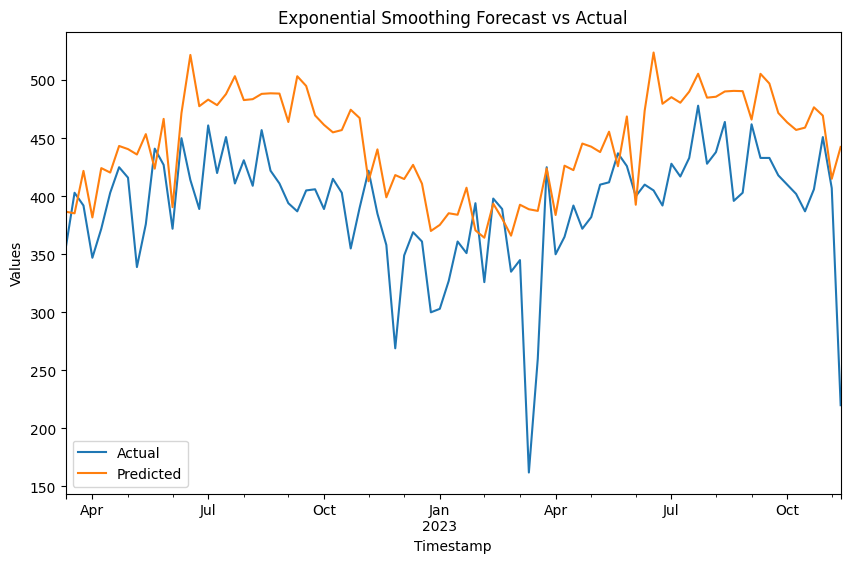

In [48]:
# Plot the results
plt.figure(figsize=(10, 6))
combined_series.plot(ax=plt.gca())
plt.title('Exponential Smoothing Forecast vs Actual')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.show()

---

## Seasonal Decomposition of Time series data

In [49]:
#Seasonal decomposition of time series data
from statsmodels.tsa.seasonal import STL

stl_model = STL(train, seasonal=13)
stl_result = stl_model.fit()
seasonal, trend, resid = stl_result.seasonal, stl_result.trend, stl_result.resid


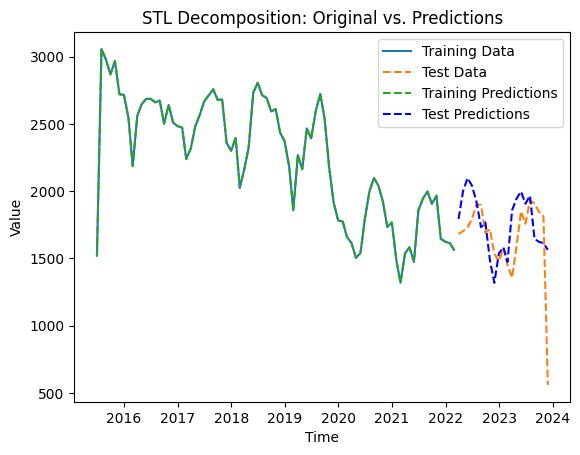

In [50]:
# Combine the components for training data
train_pred = seasonal + trend + resid

# Forecasting using the seasonal, trend, and residual components for the test set
test_pred = seasonal[-len(test):] + trend[-len(test):] + resid[-len(test):]

# Plotting the original time series
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data', linestyle='--')

# Plotting the predictions
plt.plot(train_pred, label='Training Predictions', linestyle='--')
plt.plot(test.index, test_pred, label='Test Predictions', linestyle='--', color = 'blue')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('STL Decomposition: Original vs. Predictions')

# Displaying the legend
plt.legend()

# Show the plot
plt.show()

In [51]:
# mean squared error, mean absolute error and rmse
mse2 = mean_squared_error(test, test_pred)
rmse2 = np.sqrt(mse2)
mape2 =  mean_absolute_percentage_error(test, test_pred)


print(f"Mean Squared error: {mse2}")
print(f"Root mean squared error: {rmse2}")
print(f"The mean absolute percentage error is: {mape2}")

Mean Squared error: 96313.66666666667
Root mean squared error: 310.34443231137027
The mean absolute percentage error is: nan


---

## LSTM

In [52]:
monthly_crime_count

Timestamp
2015-06-30 00:00:00+00:00    1521
2015-07-31 00:00:00+00:00    3058
2015-08-31 00:00:00+00:00    2977
2015-09-30 00:00:00+00:00    2869
2015-10-31 00:00:00+00:00    2968
                             ... 
2023-07-31 00:00:00+00:00    1930
2023-08-31 00:00:00+00:00    1909
2023-09-30 00:00:00+00:00    1848
2023-10-31 00:00:00+00:00    1813
2023-11-30 00:00:00+00:00     560
Freq: M, Length: 102, dtype: int64

In [53]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [54]:
# Assuming 'df' is your DataFrame with a single time series column 'value' and timestamps as the index
time_series = monthly_crime_count.values.reshape(-1, 1)

# Normalize the data to the range [0, 1]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(time_series)

# Split the data into training and test sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]


In [55]:
def create_sequences(data, n_steps):
    x, y = [], []
    for i in range(len(data) - n_steps):
        x.append(data[i : i + n_steps])
        y.append(data[i + n_steps])
    return np.array(x), np.array(y)

# Choose the number of time steps (look-back)
n_steps = 10

# Create sequences for training
x_train, y_train = create_sequences(train_data, n_steps)

# Create sequences for testing
x_test, y_test = create_sequences(test_data, n_steps)


In [56]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50, batch_size=8)




Epoch 1/50

9/9 [==============================] - 1s 3ms/step - loss: 0.3701
Epoch 2/50
9/9 [==============================] - 0s 2ms/step - loss: 0.2796
Epoch 3/50
9/9 [==============================] - 0s 2ms/step - loss: 0.1915
Epoch 4/50
9/9 [==============================] - 0s 2ms/step - loss: 0.0891
Epoch 5/50
9/9 [==============================] - 0s 2ms/step - loss: 0.0212
Epoch 6/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0214
Epoch 7/50
9/9 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 8/50
9/9 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 9/50
9/9 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 10/50
9/9 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 11/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0112
Epoch 12/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0109
Epoch 13/50
9/9 [==============================] - 0s 2ms/step - loss:

In [57]:
# Make predictions on the test set
predictions = model.predict(x_test)

# Inverse transform the scaled predictions to the original scale
predictions = scaler.inverse_transform(predictions)

# Inverse transform the original test data for comparison
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))


1/1 [==============================] - 0s 140ms/step


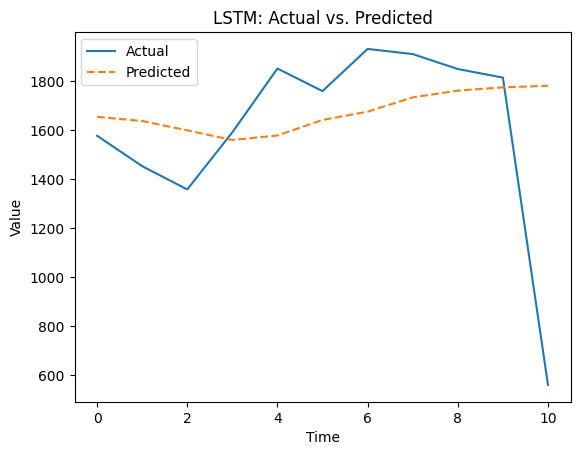

In [58]:
# Plot the actual vs. predicted values
plt.plot(y_test_original, label='Actual')
plt.plot(predictions, label='Predicted', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('LSTM: Actual vs. Predicted')
plt.legend()
plt.show()


LSTM 2

In [50]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(n_steps, 1), return_sequences=True))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(units=1))


In [54]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(n_steps, 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(units=1))


In [55]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [56]:
model.fit(x_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 0.4250
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3204
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 0.2078
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0768
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0294
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0329
Epoch 7/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0169
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0240
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0212
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0159
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0191
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0163
Epoch 13/100
5/5 [==============================] - 0s 711us/

In [58]:
# Make predictions on the test set
predictions2 = model.predict(x_test)

# Inverse transform the scaled predictions to the original scale
predictions2 = scaler.inverse_transform(predictions2)

# Inverse transform the original test data for comparison
y_test_original1 = scaler.inverse_transform(y_test.reshape(-1, 1))

1/1 [==============================] - 0s 150ms/step


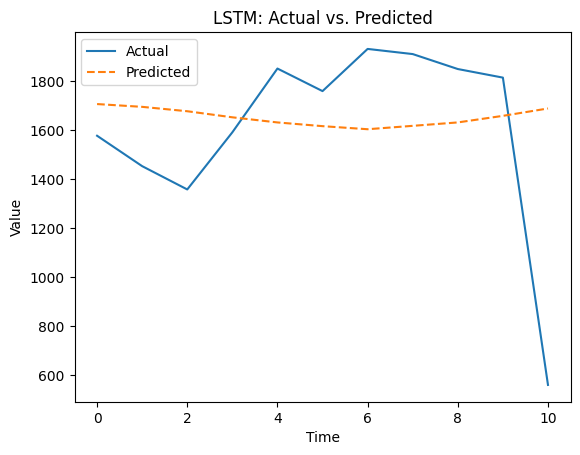

In [59]:
# Plot the actual vs. predicted values
plt.plot(y_test_original1, label='Actual')
plt.plot(predictions2, label='Predicted', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('LSTM: Actual vs. Predicted')
plt.legend()
plt.show()


---